In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv("train.csv")

In [4]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:

train.drop(["PassengerId",'Ticket'],axis = 1,inplace = True)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [7]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


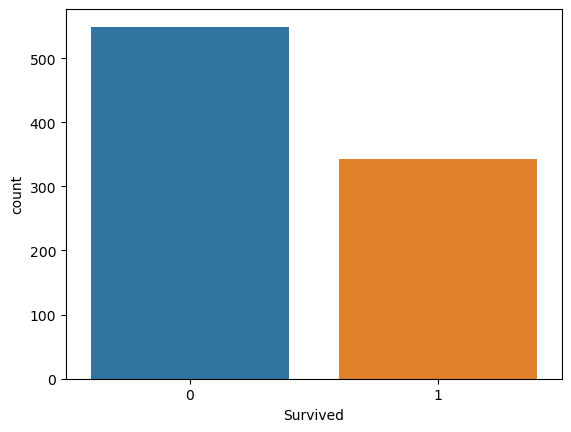

In [8]:

sns.countplot(x='Survived', data=train);

In [9]:
train.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

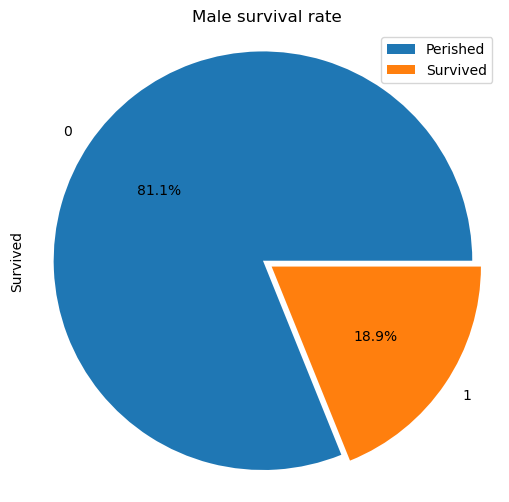

In [10]:
train[train['Sex'] == 'male'].Survived.groupby(train.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("Male survival rate")
plt.show()

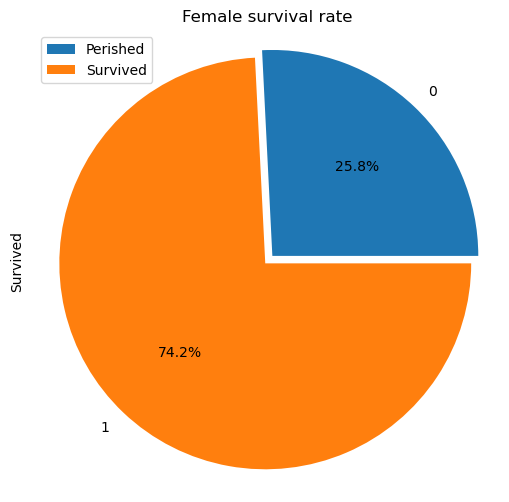

In [11]:
train[train['Sex'] == 'female'].Survived.groupby(train.Survived).count().plot(kind='pie',autopct='%1.1f%%',figsize=(6, 6),explode=[0,0.05])
plt.axis('equal')
plt.title("Female survival rate")
plt.legend(["Perished","Survived"])
plt.show()

In [12]:
pd.crosstab(train.Pclass, train.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


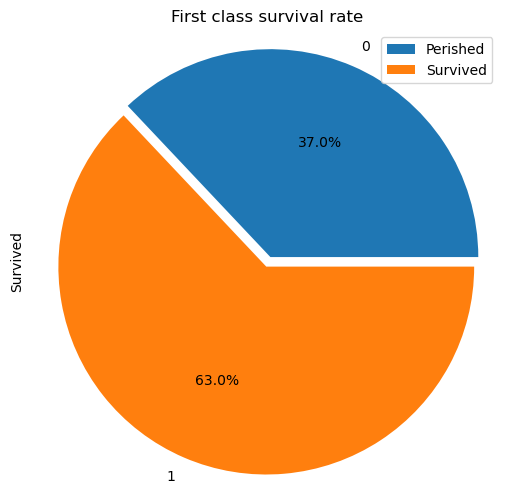

In [13]:
train[train['Pclass'] == 1].Survived.groupby(train.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("First class survival rate")
plt.show()

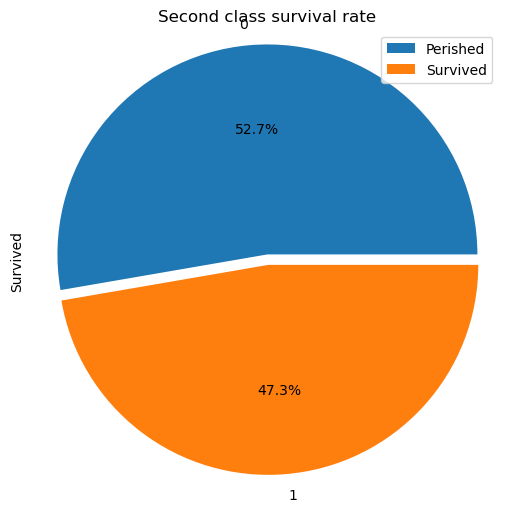

In [14]:
train[train['Pclass'] == 2].Survived.groupby(train.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("Second class survival rate")
plt.show()

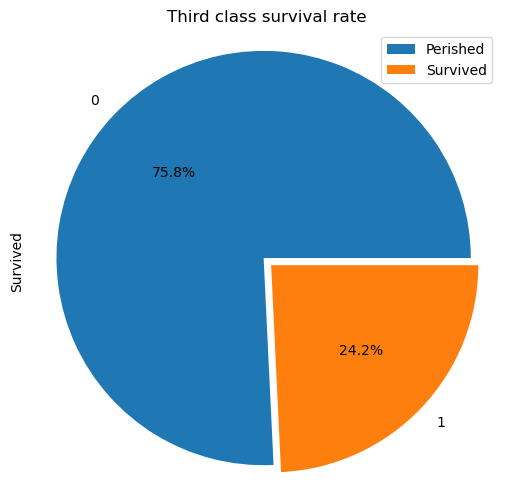

In [15]:
train[train['Pclass'] == 3].Survived.groupby(train.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("Third class survival rate")
plt.show()

In [16]:
pd.crosstab([train.Sex, train.Survived], train.Pclass, margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

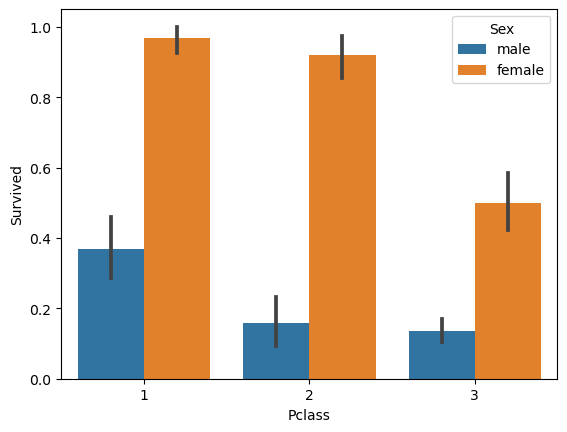

In [17]:
sns.barplot('Pclass','Survived',hue='Sex', data=train)

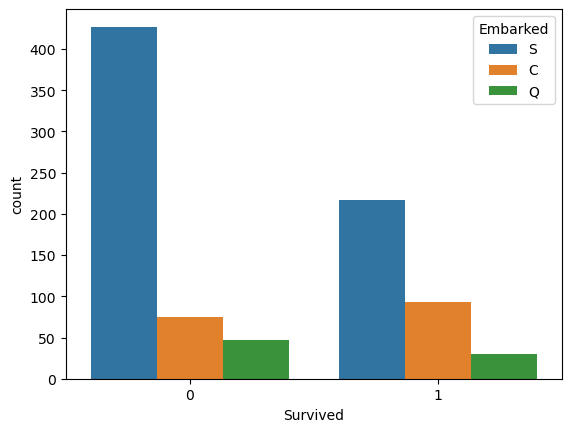

In [18]:
sns.countplot(x='Survived', data=train,hue = 'Embarked');

In [19]:
pd.crosstab([train.Sex, train.Survived], [train.SibSp, train.Pclass], margins=True)

SibSp              0             1          2         3          4  5  8  All
Pclass             1    2    3   1   2   3  1  2   3  1  2   3   3  3  3     
Sex    Survived                                                              
female 0           1    3   33   2   3  21  0  0   3  0  0   7   4  1  3   81
       1          48   41   48  38  25  17  3  3   4  2  1   1   2  0  0  233
male   0          59   67  235  16  20  35  1  4   7  1  0   4  11  4  4  468
       1          29    9   35  15   7  10  1  1   1  0  0   0   1  0  0  109
All              137  120  351  71  55  83  5  8  15  3  1  12  18  5  7  891

In [20]:
pd.crosstab([train.Sex, train.Survived], [train.Parch, train.Pclass], margins=True)

Parch              0             1           2          3     4     5  6  All
Pclass             1    2    3   1   2   3   1   2   3  2  3  1  3  3  3     
Sex    Survived                                                              
female 0           1    5   35   0   1  13   2   0  17  0  1  0  2  3  1   81
       1          63   40   50  17  17  12  11  11   8  2  1  0  0  1  0  233
male   0          63   81  260  10   7  22   3   3  15  0  1  1  1  1  0  468
       1          36    8   36   4   7   8   5   2   3  0  0  0  0  0  0  109
All              163  134  381  31  32  55  21  16  43  2  3  1  3  5  1  891

In [21]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [22]:
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NaN,C


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

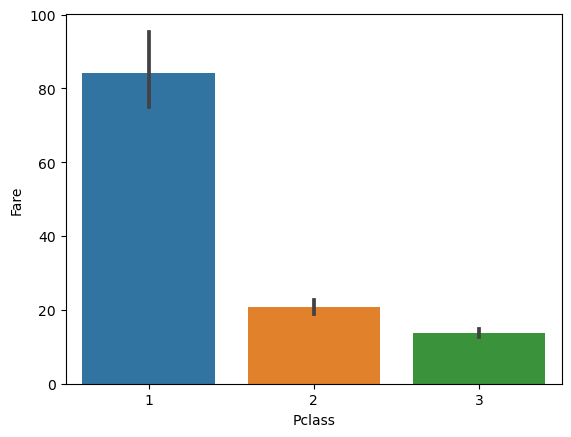

In [23]:
sns.barplot(y = "Fare",x = "Pclass",data = train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 68.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


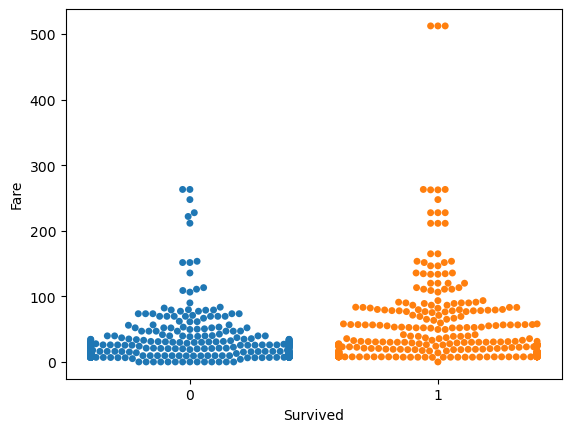

In [24]:
sns.swarmplot(x='Survived', y='Fare', data=train);

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

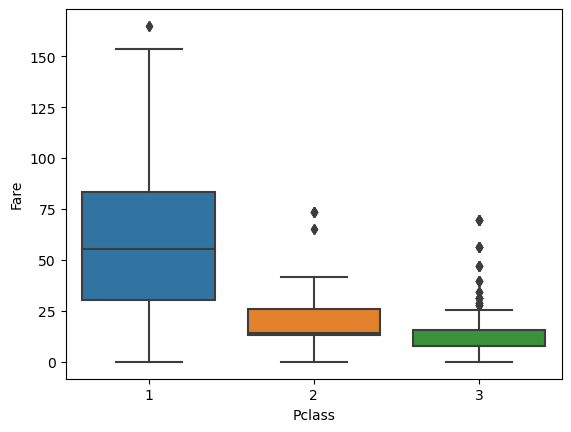

In [25]:
sns.boxplot(y = "Fare",x = "Pclass",data = train[train["Fare"] < 200])

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

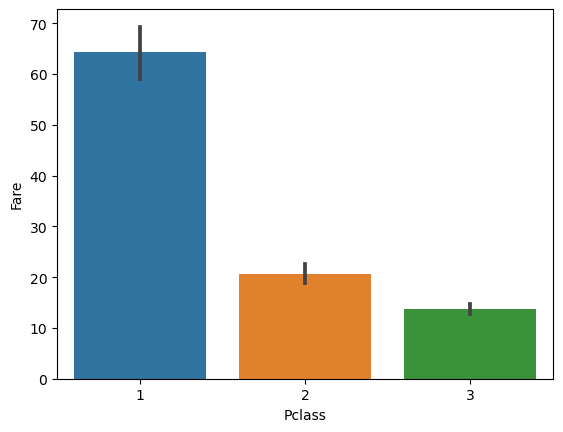

In [26]:
sns.barplot(y = "Fare",x = "Pclass",data = train[train["Fare"] < 200])

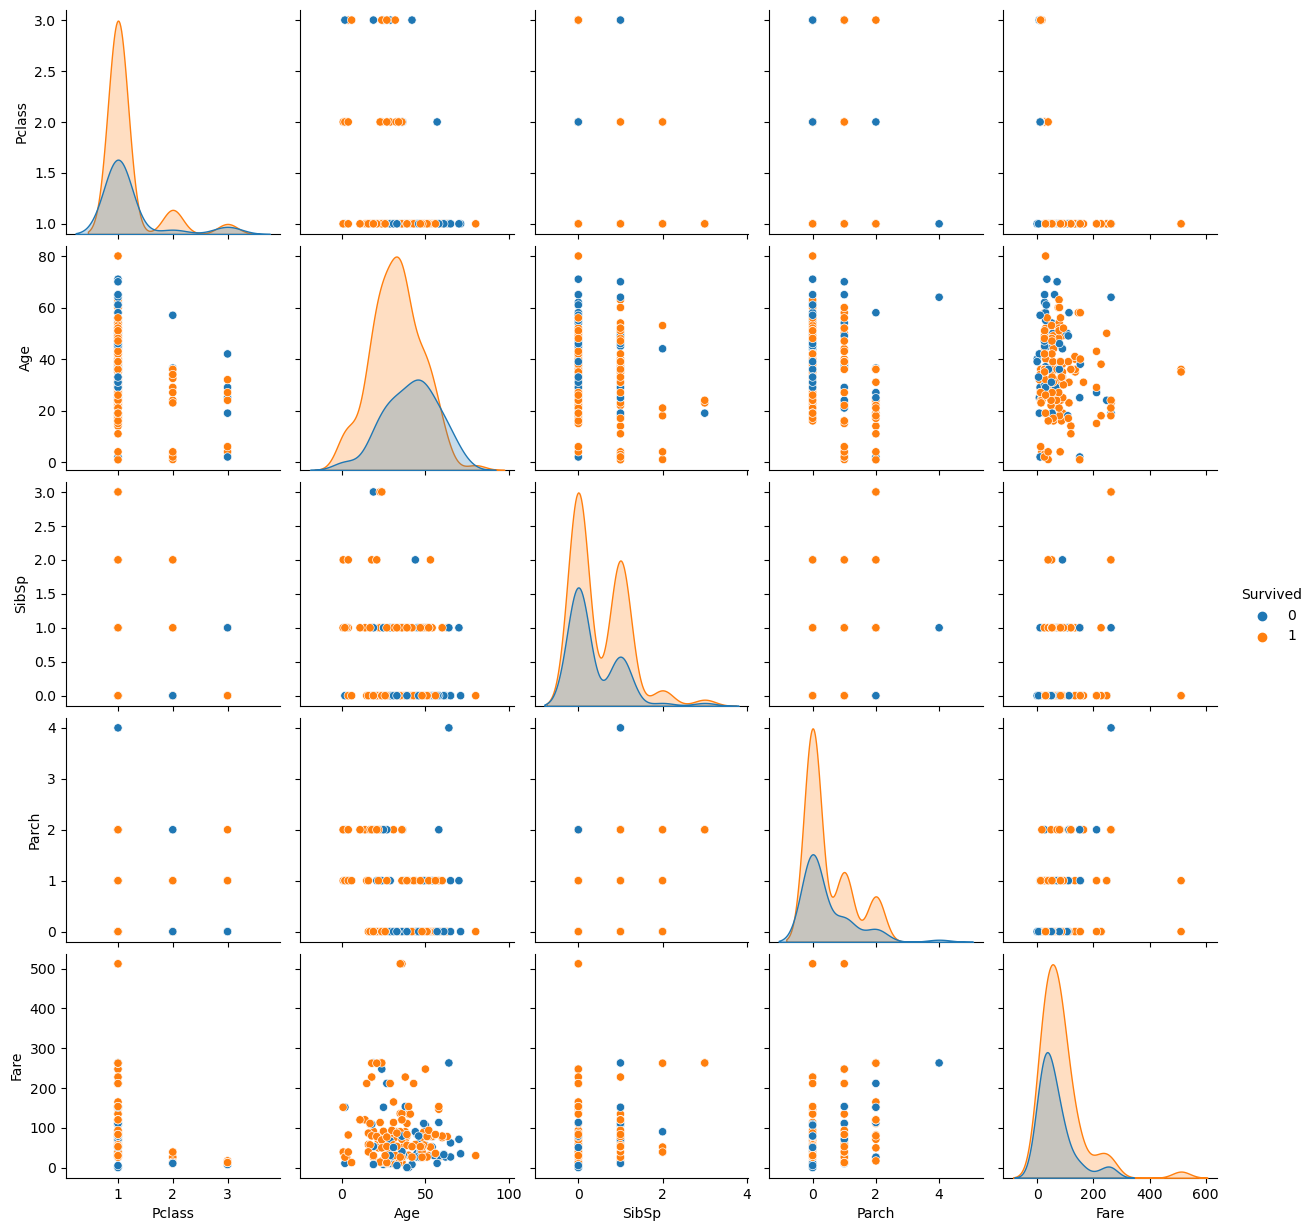

In [27]:
sns.pairplot(train.drop("Name",axis = 1).dropna(),hue = "Survived")

In [28]:
train.groupby('Survived').describe()['Age']

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


In [29]:
train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [30]:
def extract(x):
    temp = x.split(" ")
    if "Mr." in temp:
        return "Mr"
    elif "Mrs." in temp:
        return "Mrs"
    elif "Miss." in temp:
        return "Miss"
    elif "Master." in temp:
        return "Master"
    elif "Dr." in temp:
        return "Dr"
    else:
        return None

In [31]:
train["Category"] = train["Name"].apply(extract)

In [32]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Category
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Mr


In [33]:
train["Category"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', None, 'Dr'], dtype=object)

In [34]:
print("Mr." , np.mean(train[train["Category"] == "Mr"]["Age"]))
print("Mrs." , np.mean(train[train["Category"] == "Mrs"]["Age"]))
print("Miss." , np.mean(train[train["Category"] == "Miss"]["Age"]))
print("Master." , np.mean(train[train["Category"] == "Master"]["Age"]))
print("Dr." , np.mean(train[train["Category"] == "Dr"]["Age"]))

Mr. 32.368090452261306
Mrs. 35.898148148148145
Miss. 21.773972602739725
Master. 4.574166666666667
Dr. 42.0
